In [1]:
#  

In [2]:
! pip install seaborn

In [3]:
#!pip install matplotlib

In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# load the laptop data
df = pd.read_csv("laptop_data.csv")

In [6]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [7]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
# check for missing value
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
# checking for duplicate rows
df.duplicated().sum()

np.int64(29)

In [10]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [11]:
# check the numerical and non numerical column
catvar = df.select_dtypes(include=['object']).columns
numvar = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns
catvar, numvar

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [12]:
# check unique value
def uniquevals(col):
    print(f'Detail of the particular col {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'valuecounts of the particular col {col} is : {df[col].value_counts()}')

for col in df.columns:
    uniquevals(col)
    print("."*75)

Detail of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
...........................................................................
Detail of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
...........................................................................
Detail of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
...........................................................................
Detail of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1

In [13]:
'''
So on observation we can see that if we remove "GB" from Ram,
I can make it as an integer value then after, now same with memories as well as weight, 
for weight, for weigh I can classify it as floating variable using the str.replace() as shown
'''
df['Ram'] = df['Ram'].str.replace('GB', ' ')
df['Weight'] = df['Weight'].str.replace('kg', ' ')

# converting from string tom float for the weight
df['Weight'] = df['Weight'].astype('float32')
df['Ram'] = df['Ram'].astype('int32')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploring data

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\1792033495.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'], color = 'red')


<Axes: xlabel='Price', ylabel='Density'>

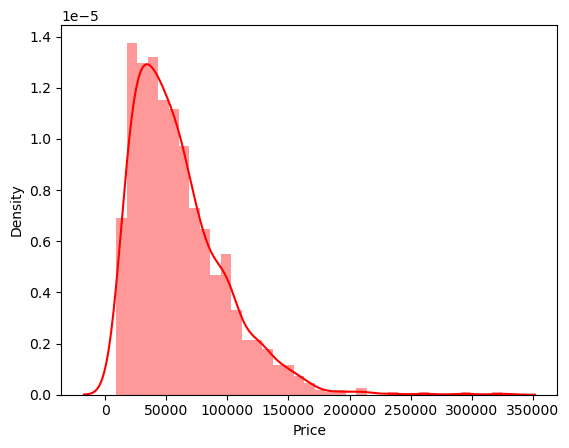

In [15]:
# view the distribution of price columns
sn.distplot(df['Price'], color = 'red')

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\371216646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot( x = df[col], palette = 'plasma')
C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\371216646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot( x = df[col], palette = 'plasma')
C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\371216646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot( x = df[col], palette = 'plasma')
C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\371216646.py:4: FutureWarning: 

Passing `palette` witho

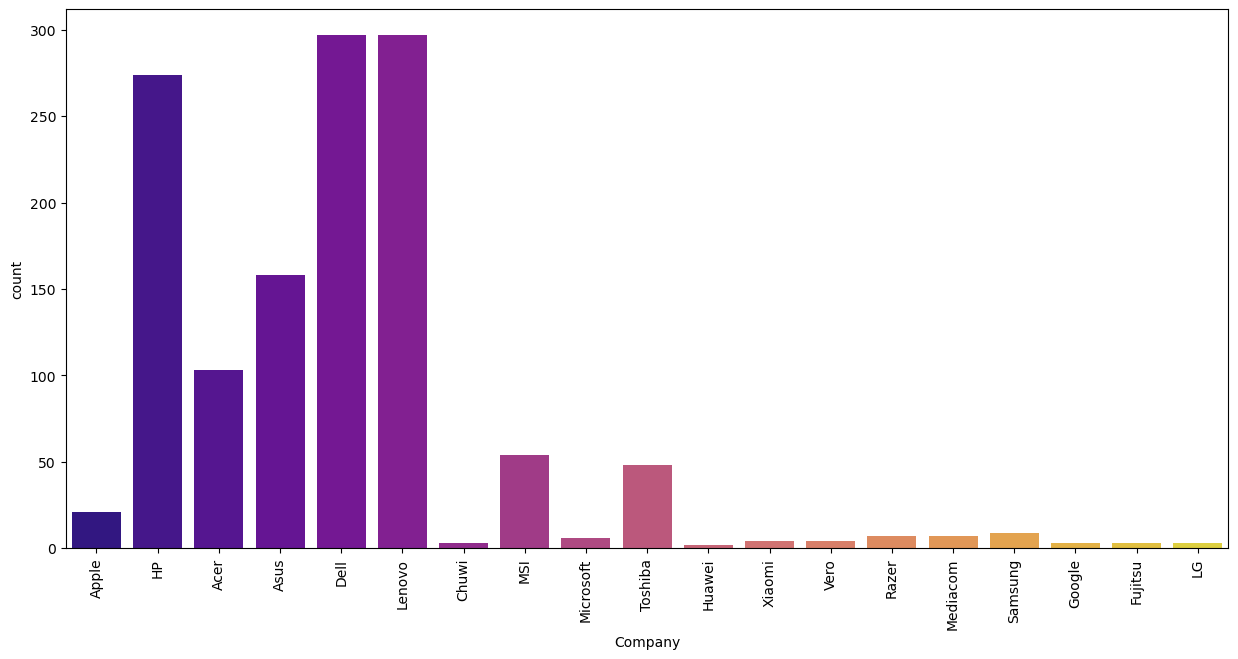

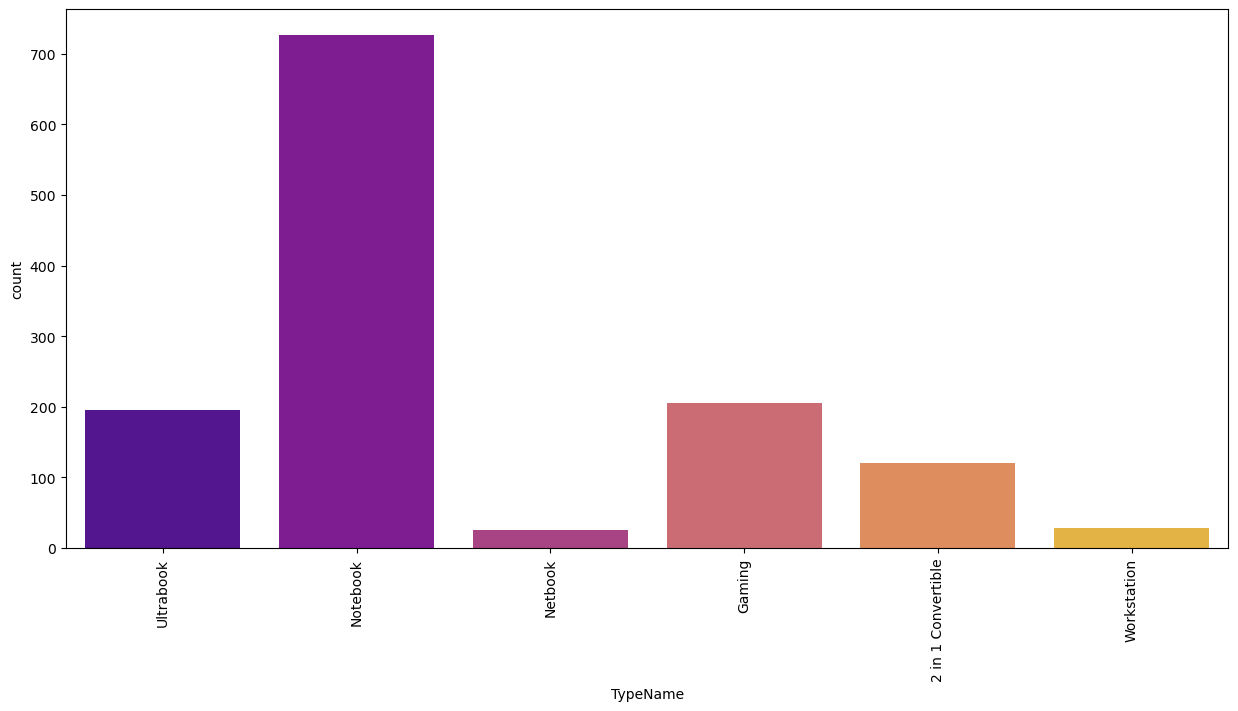

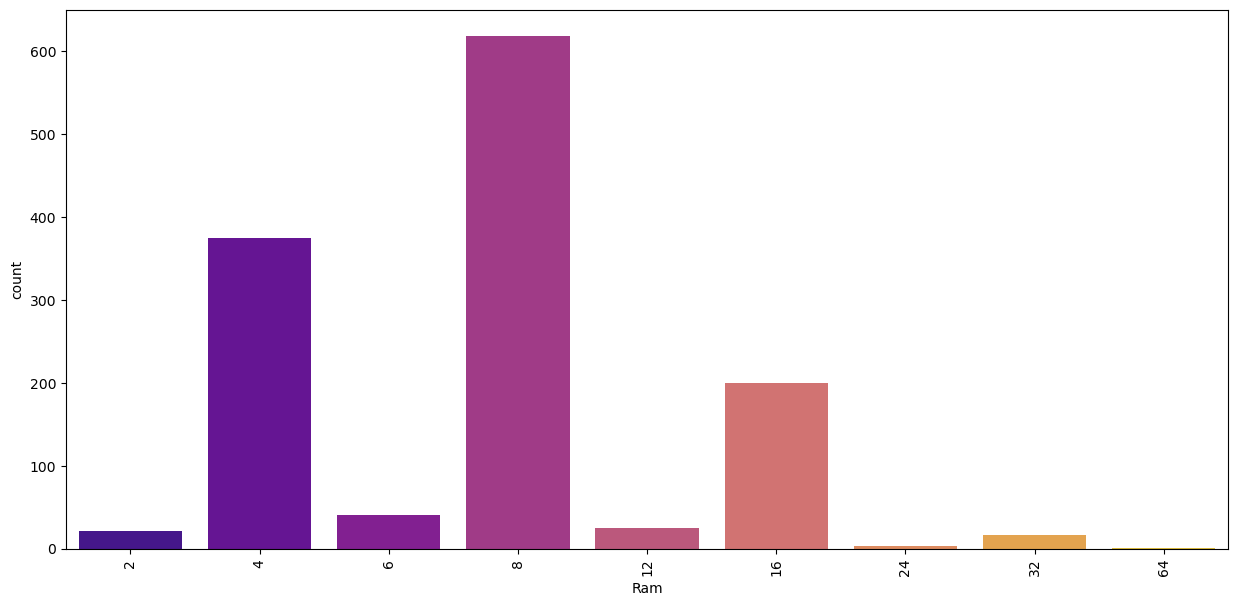

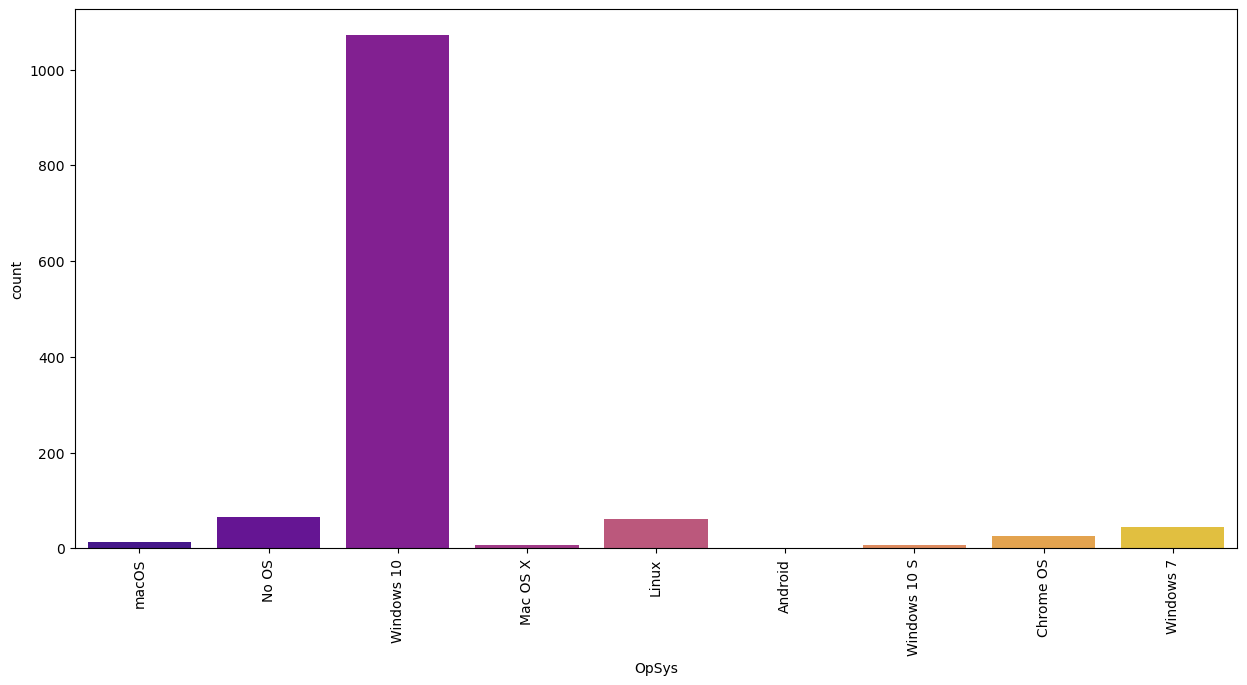

In [16]:
# plotting data
def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot( x = df[col], palette = 'plasma')
    plt.xticks(rotation= 'vertical')
    plt.xticks(rotation = 90)

toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
    drawplot(col)

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\3067956750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x =df['Company'], y = df['Price'], palette = 'tab20')


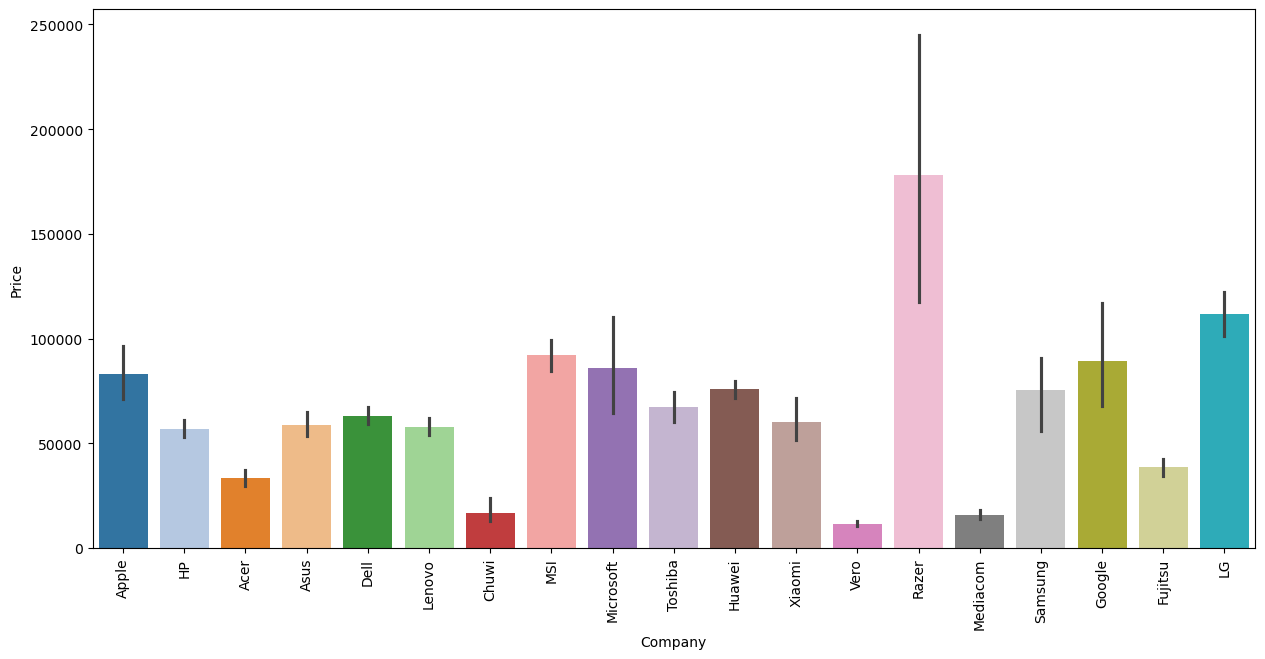

In [17]:
# Check the avaerage price of a coputer by aa company
plt.figure(figsize=(15,7))
sn.barplot(x =df['Company'], y = df['Price'], palette = 'tab20')
plt.xticks(rotation ='vertical')
plt.show()

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\3179750089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x = df['TypeName'], y = df['Price'], palette = 'tab20')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

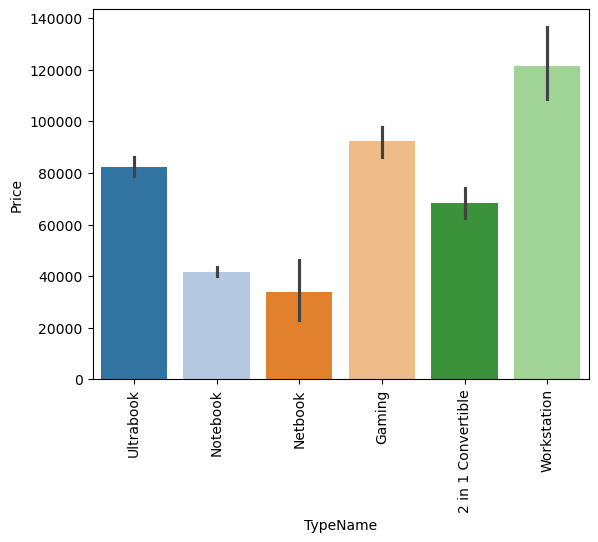

In [18]:
# Now the TyNmae and the price
sn.barplot(x = df['TypeName'], y = df['Price'], palette = 'tab20')
plt.xticks(rotation = 'vertical')

<Axes: xlabel='Inches', ylabel='Price'>

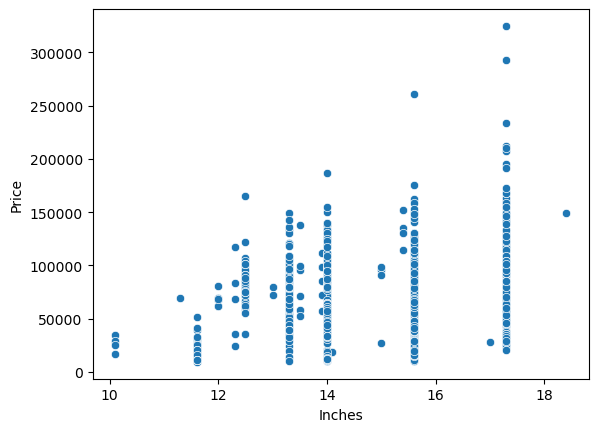

In [19]:
# now inches and price
sn.scatterplot(x = df['Inches'], y = df['Price'])

# Preprocessing

In [20]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [21]:
# Creating a new col, touchscreen if the value is 1 that laptop is touch screen
df['Touchscreen'] = df['ScreenResolution'].apply( lambda element: 1
                                                   if 'Touchscreen' in element else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [22]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


In [23]:
df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
235,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon R7 M445,Linux,2.36,47898.7200,0
571,HP,Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,1.94,20725.9200,0
1091,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.86,18434.3472,0
772,Toshiba,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.75,54345.6000,0
160,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.03,21471.8400,0
977,Asus,2 in 1 Convertible,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.7GHz,16,512GB SSD + 2TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.30,95850.7200,1
525,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,2.02,71395.2000,0


In [24]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\1436331050.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot( x = df['Touchscreen'], palette = 'plasma')


<Axes: xlabel='Touchscreen', ylabel='count'>

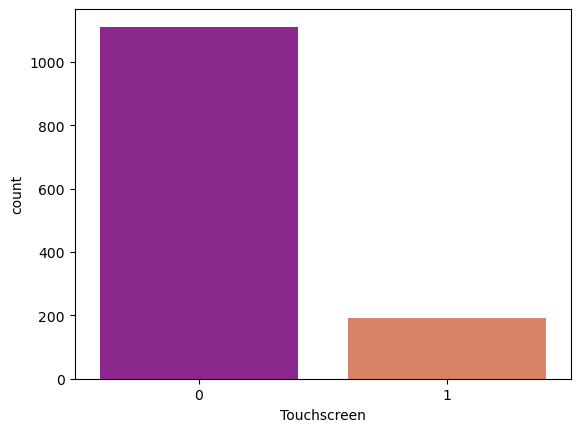

In [25]:
sn.countplot( x = df['Touchscreen'], palette = 'plasma')
              

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

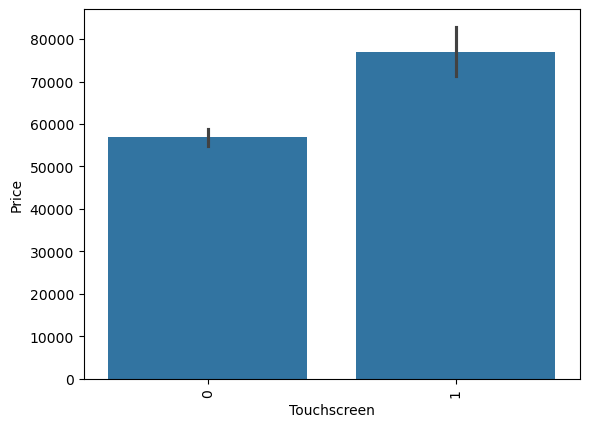

In [26]:
# compare touchscreen and the price
sn.barplot(x = df['Touchscreen'], y = df['Price'])
plt.xticks(rotation = 'vertical')

In [27]:
df['IPS'] = df['ScreenResolution'].apply(lambda element : 1
                                         if 'IPS' in element else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\2740350468.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot( x= df['IPS'], palette = 'plasma')


<Axes: xlabel='IPS', ylabel='count'>

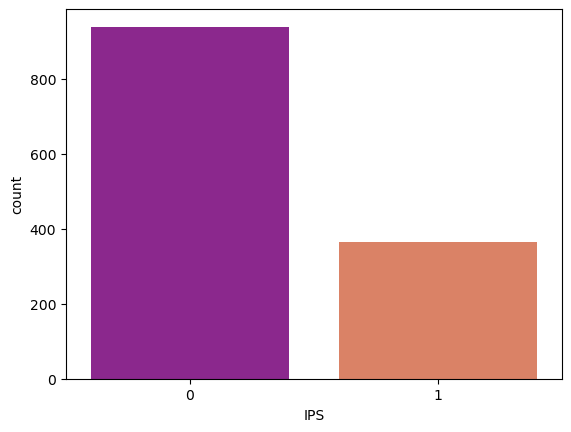

In [28]:
sn.countplot( x= df['IPS'], palette = 'plasma')

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\1498322569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot( x = df['IPS'], y = df['Price'], palette = 'plasma')


<Axes: xlabel='IPS', ylabel='Price'>

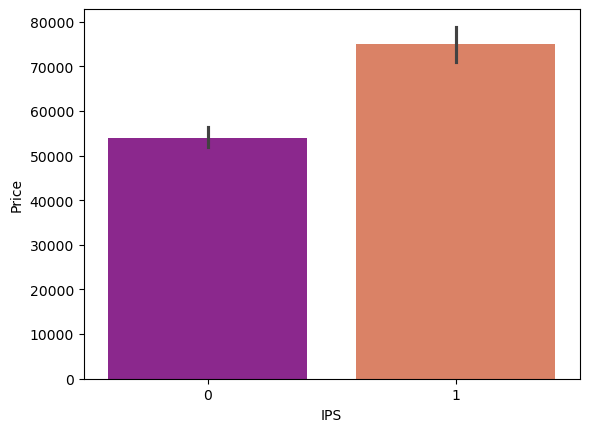

In [29]:
# price and IPS
sn.barplot( x = df['IPS'], y = df['Price'], palette = 'plasma')

# Extract the X resolution and the Y resolution

In [30]:
# split 

splitdf = df['ScreenResolution'].str.split('x', n = 1, expand = True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [31]:
splitdf = df['ScreenResolution'].str.split('x', n = 1, expand = True)
df['x_res'] = splitdf[0]
df['y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [32]:
# split the text and integer part of x_res
df['x_res'] = df['x_res'].str.replace(',', ' ').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [33]:
# convert x_res and y_rest to int
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


<Axes: >

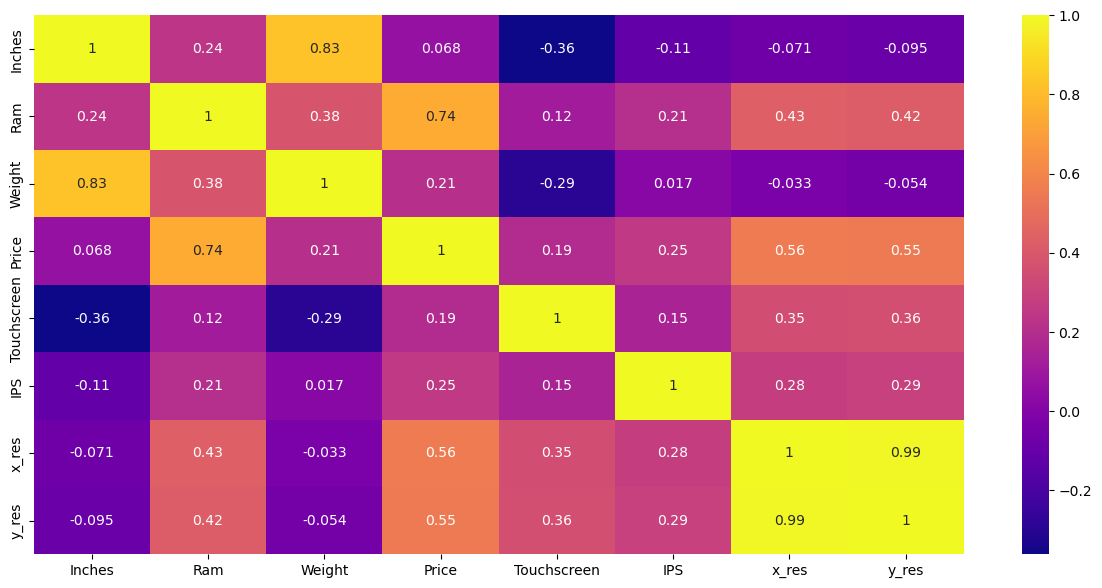

In [34]:
# look at the correlation
plt.figure(figsize = (15, 7))
sn.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'plasma')

In [35]:
df.corr(numeric_only = True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [36]:
# Let do data ingeniering to combine the x_res and y_res because the have almot the same impact on the price
df['PPI'] = (((df['x_res']**2+df['y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [37]:
# Now Drop the  x_res and y_res column
df.drop(columns = ['ScreenResolution', 'Inches', 'x_res', 'y_res'], inplace = True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


# Now we will work on CPU because it has a big impact on Price

### 
Most common computer are made by intel right, so we will be clustering their preprocessor into diferrent categorie like i5, i7........

we have to extract the firt 3 word of every row under CPU col 

In [38]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [39]:
'''
As all the computer now are intel we will divide the cp between intel CPu or other
'''
def processortype(text):
    if text =='Intel Core i7' or text =='Intel Core i5' or text =='Intel Core i3':
        return text
        
    else:
        if text.split()[0] =='Intel':
            return 'other Intel Processor'
        else:
            return 'AMD processor'
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\908849084.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x = df['CPU_name'], palette ='plasma')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'other Intel Processor')])

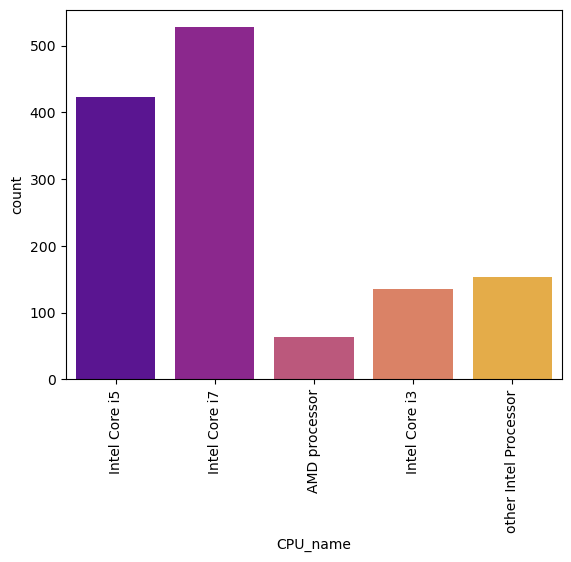

In [40]:
sn.countplot(x = df['CPU_name'], palette ='plasma')
plt.xticks(rotation = 'vertical')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'other Intel Processor')])

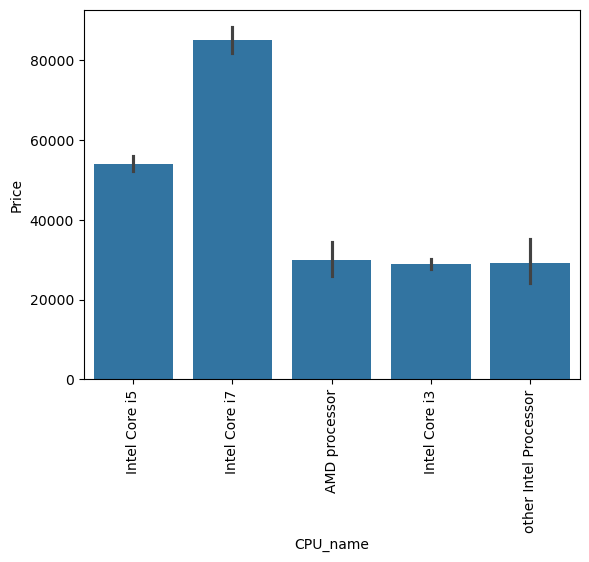

In [41]:
sn.barplot(x= df['CPU_name'], y= df['Price'])
plt.xticks(rotation = 'vertical')

In [42]:
## drop the cpu colum
df.drop(columns = ['Cpu'], inplace = True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


## Now let work on RAM

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\3727127775.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot( x = df['Ram'], palette ='autumn')


<Axes: xlabel='Ram', ylabel='count'>

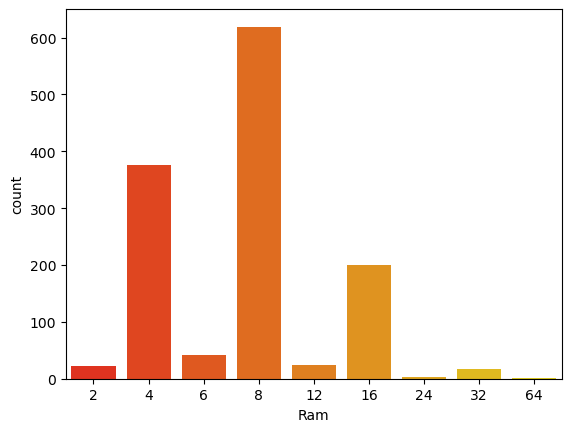

In [43]:
sn.countplot( x = df['Ram'], palette ='autumn')

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\1337140369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x =df['Ram'], y=df['Price'], palette = 'plasma')


<Axes: xlabel='Ram', ylabel='Price'>

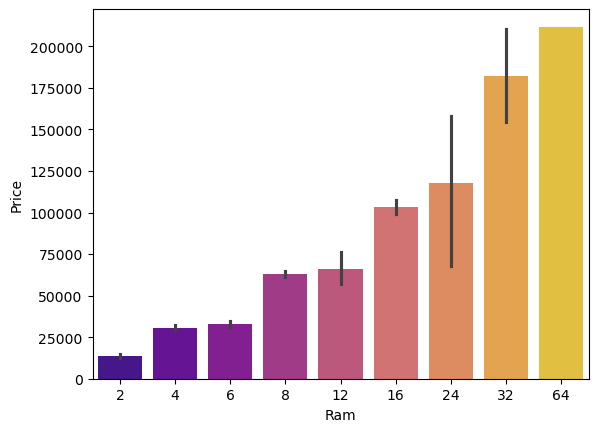

In [44]:
# compare price and ram
sn.barplot(x =df['Ram'], y=df['Price'], palette = 'plasma')

# Now let work on memory 

In [45]:
# 4 most comon varialbe observed : HHD, SSD, Flash, Hybrid
# This expression will remove the decimal space for example 1.0 TB will be 1TB
df['Memory'] = df['Memory'].astype(str).replace('\.0', ' ',regex = True)
# replace  the CB word with " "
df['Memory'] = df['Memory'].str.replace('GB', ' ')
# replace TB word with "000"
df['Memory'] = df['Memory'].str.replace('TB', '000')
# split the word accross the "+" character
newdf = df['Memory'].str.split("+", n = 1, expand = True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [46]:
# 
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [47]:
# create a  function to split categorize HDD, SDD, HYBRID, FLASHSTORAGE
def applychanges(value):
    df['Layer1'+value] =df['first'].apply(lambda x: 1 if value in x else 0)

listtoapply = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']
for value in listtoapply:
    applychanges(value)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [48]:
# remove all the character and keep the number
df['first'] = df['first'].astype(str).str.replace(r'\D+', '', regex = True)
df['first'].value_counts()

first
256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [49]:
df['second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [50]:
def applychanges1(value):
    df['Layer2'+value] =df['second'].apply(lambda x: 1 if value in x else 0)

listtoapply1 = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']
df['second'] = df['second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)

# remove all the characters just keep the numbers
df['second'] = df['second'].astype(str).str.replace(r'\D+', '', regex = True)
df['second'].value_counts()

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [51]:
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

In [52]:
# storing element in a subsequence column to reduce the column
df['HHD'] =(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])

df['SSD'] =(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])

df['Hybrid'] =(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])

df['FlashStorage'] =(df['first']*df['Layer1FlashStorage']+df['second']*df['Layer2FlashStorage'])

## dropping of uncessay

df.drop(columns = ['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 
                   'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                   'Layer2FlashStorage'], inplace = True)


In [53]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HHD,SSD,Hybrid,FlashStorage
1152,Lenovo,Notebook,8,1000 HDD,AMD Radeon R5 M330,No OS,2.32,31914.720,0,0,141.211998,Intel Core i5,1000,0,0,0
59,Asus,Notebook,4,256 SSD,Intel HD Graphics 520,Linux,2.00,22111.200,0,0,141.211998,Intel Core i3,0,256,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.808,0,1,226.983005,Intel Core i5,0,256,0,0
1251,HP,Notebook,4,500 HDD,AMD Radeon R4 Graphics,Windows 10,1.86,21258.720,0,0,100.454670,AMD processor,500,0,0,0
1224,Dell,2 in 1 Convertible,4,500 HDD,Intel HD Graphics 620,Windows 10,2.08,27119.520,1,0,146.860478,Intel Core i3,500,0,0,0


In [54]:
# Drop the memory column
df.drop(columns =['Memory'], inplace = True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HHD,SSD,Hybrid,FlashStorage
328,HP,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.26,71128.8000,0,0,176.232574,Intel Core i7,0,256,0,0
129,HP,Notebook,8,Intel UHD Graphics 620,Windows 10,2.50,49443.8400,0,0,127.335675,Intel Core i5,0,256,0,0
653,MSI,Gaming,8,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,63499.1040,0,0,141.211998,Intel Core i7,1000,128,0,0
356,Lenovo,Notebook,4,Intel HD Graphics 500,No OS,2.20,17155.6272,0,0,100.454670,other Intel Processor,1000,0,0,0
304,Asus,Gaming,8,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,67399.2000,0,0,141.211998,Intel Core i7,1000,128,0,0


In [55]:
df.corr(numeric_only = True)["Price"]

Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
PPI             0.473487
HHD            -0.096441
SSD             0.670799
Hybrid          0.007989
FlashStorage         NaN
Name: Price, dtype: float64

## 
Based on the coreelation we observe that Hybrid and Flashnstorage are almost negligible, so we can simply drop them off, where as the HDD and SSD are having good correlation, we find that HDD has -ve relation with price.


In [56]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'IPS', 'PPI', 'CPU_name', 'HHD', 'SSD', 'Hybrid',
       'FlashStorage'],
      dtype='object')

In [57]:
df.drop(columns = ['Hybrid', 'FlashStorage'], inplace = True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HHD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


# Analysis on GPU

In [58]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

## we will split the GPU the get only the company name

In [59]:
## extract the brand name
a = df['Gpu'].iloc[1] # take the item in the first position
print(a.split()[0])

Intel


In [60]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [61]:
df['Gpu Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu Brand, Length: 1303, dtype: object

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\1882979468.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x=df['Gpu Brand'], palette ='plasma')


<Axes: xlabel='Gpu Brand', ylabel='count'>

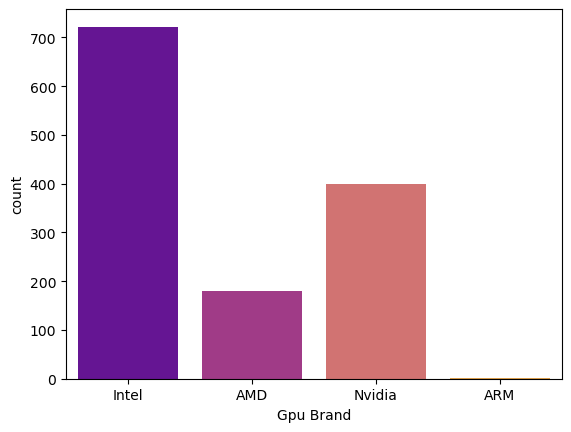

In [62]:
sn.countplot(x=df['Gpu Brand'], palette ='plasma')

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\1025460772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x =df['Gpu Brand'], palette ='plasma')


<Axes: xlabel='Gpu Brand', ylabel='count'>

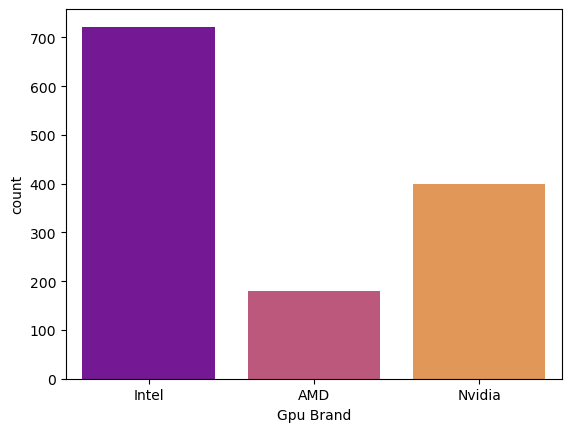

In [63]:
# Removing the 'ARm' tuple
df = df[df['Gpu Brand']!= 'ARM']
sn.countplot(x =df['Gpu Brand'], palette ='plasma')  

<Axes: xlabel='Gpu Brand', ylabel='Price'>

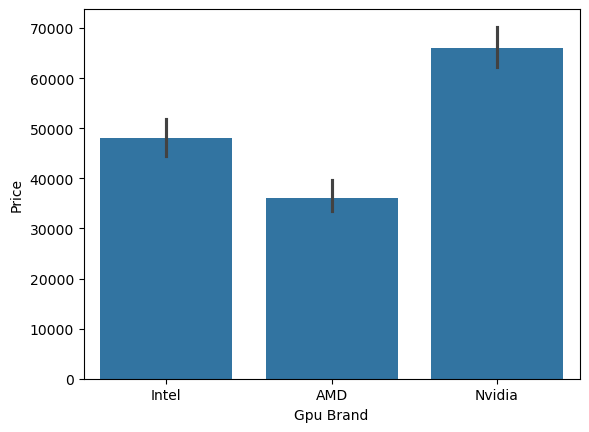

In [64]:
# compare
# We used np.median in order to check if there is any impact 
sn.barplot(x=df['Gpu Brand'], y= df['Price'], estimator = np.median)


In [65]:
# Now drop the Gpu Columns
df = df.drop(columns =['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HHD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


# Now we will preprocess OpSys

In [66]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\1084244025.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=df['OpSys'], y=df['Price'], palette ='plasma')


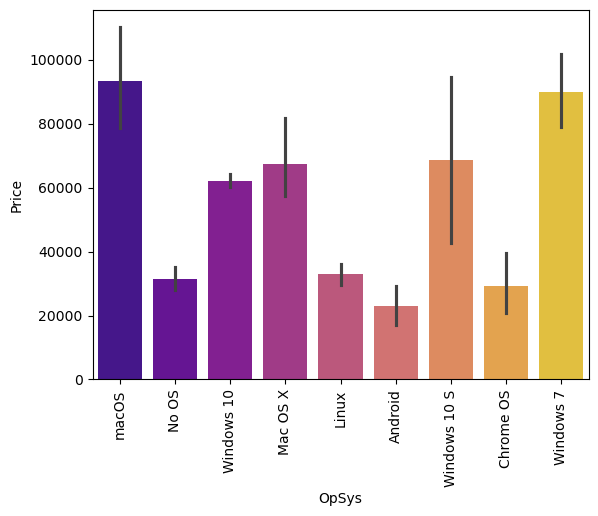

In [67]:
sn.barplot(x=df['OpSys'], y=df['Price'], palette ='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

In [68]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [69]:
# club (windows 10, windows 7 s) = windows
#club (macos, mac os x) = mac
# else  return other
def setcategory(text):
    
    if text == 'Windows 10' or text =='Windows 7' or text =='Windows 10S':
    
        return 'Windows'
    elif text =='Mac OS X' or text =='macOS':
        return 'Mac'
    else:
        return 'other'



        
    
    

In [70]:
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HHD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [71]:
df.sample(7)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HHD,SSD,Gpu Brand
299,Asus,Ultrabook,16,Windows,1.63,78215.04,0,0,141.211998,Intel Core i7,0,512,Nvidia
543,Acer,Gaming,8,other,2.40,42517.44,0,0,141.211998,Intel Core i5,1000,0,Nvidia
489,Asus,Ultrabook,16,Windows,0.91,103896.00,0,0,176.232574,Intel Core i7,0,512,Intel
113,HP,Notebook,4,Windows,1.63,38468.16,0,1,111.935204,Intel Core i5,500,0,Intel
204,Dell,Workstation,16,Windows,2.80,162770.40,0,0,282.423996,other Intel Processor,1000,256,Nvidia
35,Lenovo,Notebook,4,Windows,1.44,13266.72,0,0,111.935204,other Intel Processor,0,0,Intel
125,HP,Notebook,4,other,1.86,13799.52,0,0,100.454670,other Intel Processor,500,0,Intel


C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\3784182178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x =df['OpSys'], palette ='plasma')


<Axes: xlabel='OpSys', ylabel='count'>

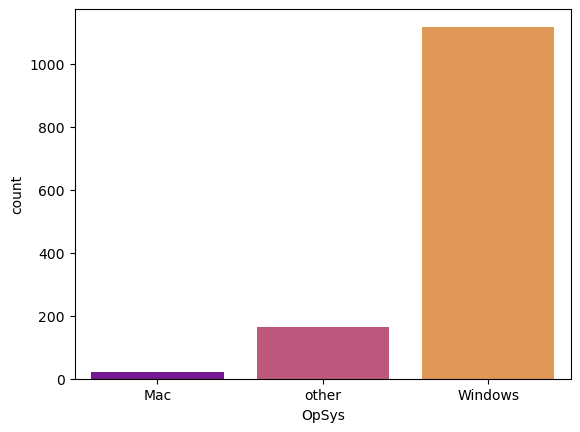

In [72]:
sn.countplot(x =df['OpSys'], palette ='plasma')

([0, 1, 2], [Text(0, 0, 'Mac'), Text(1, 0, 'other'), Text(2, 0, 'Windows')])

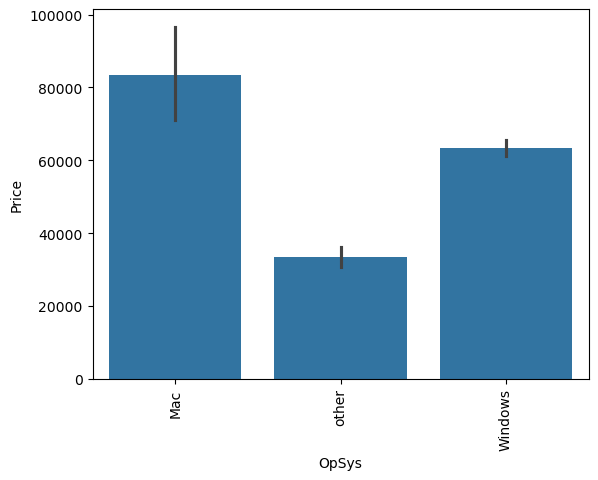

In [73]:
sn.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation = 'vertical')

# Weigh Analysis

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\572135600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

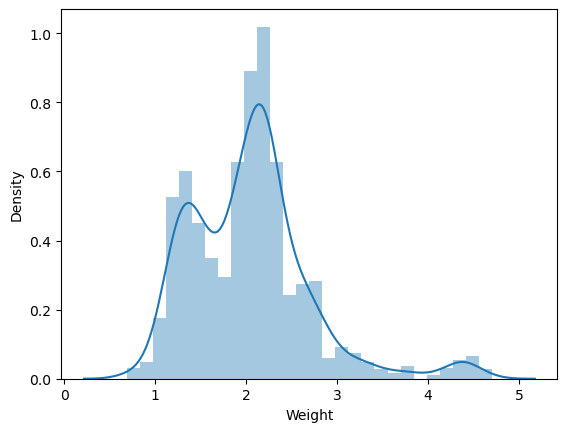

In [74]:
sn.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

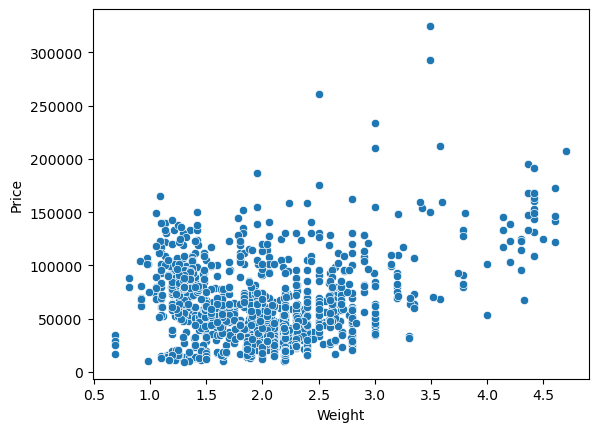

In [76]:
sn.scatterplot(x=df['Weight'], y=df['Price'])

# Price Analysis

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\2162858153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

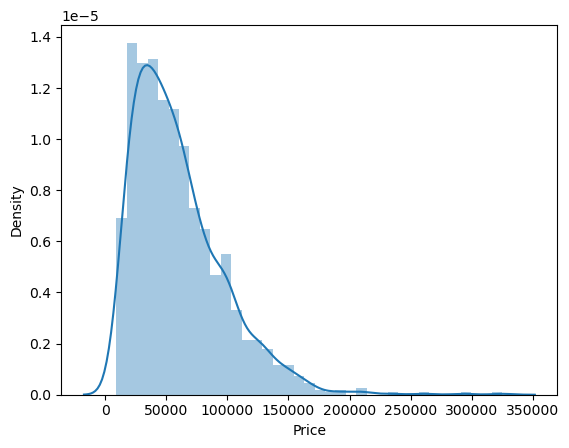

In [78]:
sn.distplot(df['Price'])

C:\Users\rakab\AppData\Local\Temp\ipykernel_39208\589762661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

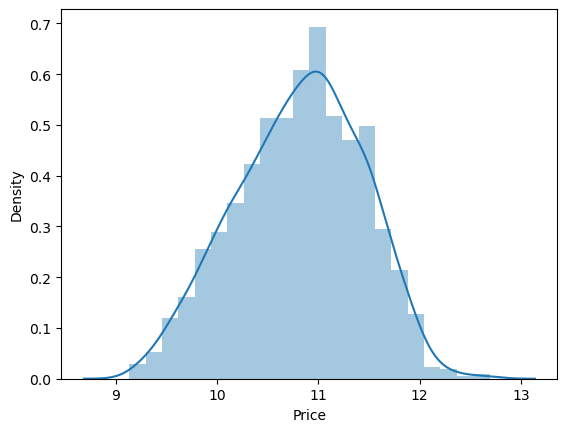

In [79]:
sn.distplot(np.log(df['Price']))

In [81]:
df.corr(numeric_only = True)['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HHD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

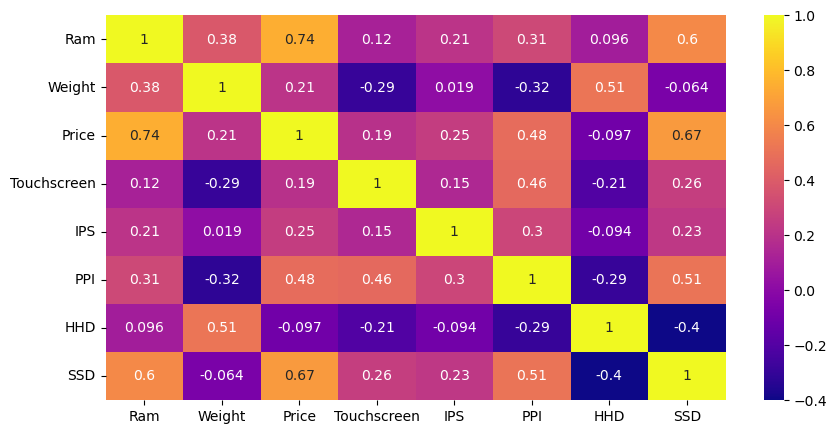

In [83]:
plt.figure(figsize = (10,5))
sn.heatmap(df.corr(numeric_only = True), annot = True, cmap ='plasma')

# Modeling

In [84]:
test = np.log(df['Price'])
train = df.drop(['Price'], axis = 1)

In [89]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/72.0 MB 14.4 MB/s eta 0:00:05
   -- ------------------------------------- 5.0/72.0 MB 14.4 MB/s eta 0:00:05
   ---- ----------------------------------- 8.4/72.0 MB 14.5 MB/s eta 0:00:05
   ------ --------------------------------- 11.5/72.0 MB 14.4 MB/s eta 0:00:05
   -------- ------------------------------- 14.7/72.0 MB 14.4 MB/s eta 0:00:04
   --------- ------------------------------ 17.8/72.0 MB 14.6 MB/s eta 0:00:04
   ----------- ---------------------------- 21.0/72.0 MB 14.6 MB/s eta 0:00:04
   ------------- -------------------------- 24.1/72.0 MB 14.7 MB/s eta 0:00:04
   --------------- ------------------------ 27.3/72.0 MB 14.7 MB/s eta 0:00:04
   ---------------- ----------------------- 30.4/72.0 MB 14.6 MB/s eta 0:00:03
   ------------------ --------------------- 33.6/72.0 MB 14.7 MB/s eta 0:00:03
   -------------------- ------------------- 36.7/72.0 MB 14.7 MB

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [92]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(train, test,
                                                    test_size = 0.15, random_state =2)
x_train.shape, x_test.shape

((1106, 12), (196, 12))

In [93]:
mapper = {i:value for i, value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'Touchscreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HHD',
 10: 'SSD',
 11: 'Gpu Brand'}

# Linear Regression

In [97]:
# we will apply oen hot encoding on the columns with this indices --[ 0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the one undergoing the transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop='first'),[0,1,3,8,11])],
                         remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print('R2 score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 score 0.809003963733376
MAE 0.20909872954695125


In [98]:
np.exp(0.20)

np.float64(1.2214027581601699)

# Ridge Regression

In [99]:
# we will apply oen hot encoding on the columns with this indices --[ 0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the one undergoing the transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop='first'),[0,1,3,8,11])],
                         remainder='passthrough')
step2 = Ridge(alpha=10)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print('R2 score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 score 0.8125198080591921
MAE 0.2098360837023082


# Lasso Regression

In [100]:
# we will apply oen hot encoding on the columns with this indices --[ 0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the one undergoing the transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop='first'),[0,1,3,8,11])],
                         remainder='passthrough')
step2 = Lasso(alpha = 0.001)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print('R2 score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 score 0.8079729476616132
MAE 0.21092286392074855


# Decision Tree 

In [101]:
# we will apply oen hot encoding on the columns with this indices --[ 0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the one undergoing the transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop='first'),[0,1,3,8,11])],
                         remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth =8)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print('R2 score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 score 0.8406538064666109
MAE 0.18260393352453086


# Random Forest 

In [102]:
# we will apply oen hot encoding on the columns with this indices --[ 0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the one undergoing the transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop='first'),[0,1,3,8,11])],
                         remainder='passthrough')
step2 = RandomForestRegressor(n_estimators = 100,
                              random_state = 3,
                              max_samples = 0.5,
                              max_features =0.75,
                              max_depth=15)
                              
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print('R2 score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 score 0.8852399747418759
MAE 0.16056942376453318


In [103]:
import pickle
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe,open('pipe.pkl', 'wb'))

In [104]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,CPU_name,HHD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [105]:
# export the train data to csv
train.to_csv('Traindataset.csv', index = None)

# Hyperparameter tuning

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# Step 1: Column transformer
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,3,8,11])
    ],
    remainder='passthrough'
)

# Step 2: Random Forest
step2 = RandomForestRegressor(random_state=3)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Parameter distribution
param_dist = {
    'step2__n_estimators': [100, 200, 300, 500],
    'step2__max_depth': [None, 5, 10, 15, 20, 30],
    'step2__max_features': [0.5, 0.75, 'sqrt', 'log2'],
    'step2__min_samples_split': [2, 5, 10],
    'step2__min_samples_leaf': [1, 2, 4],
    'step2__max_samples': [0.5, 0.75,0.9, None]
}

# Randomized Search
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=30,              # number of random combinations
    cv=5,                   # cross-validation folds
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit
random_search.fit(x_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Prediction
y_pred = best_model.predict(x_test)

print("Best R2:", metrics.r2_score(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("Best Params:", random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best R2: 0.8950139592049811
MAE: 0.1536517154334115
Best Params: {'step2__n_estimators': 500, 'step2__min_samples_split': 2, 'step2__min_samples_leaf': 1, 'step2__max_samples': 0.75, 'step2__max_features': 0.5, 'step2__max_depth': 30}


In [107]:
final_model = random_search.best_estimator_
final_model.fit(x_train, y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_tnf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [109]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = final_model.predict(x_test)
print("Final R2 :", r2_score(y_test, y_pred))
print("Final MAE :", mean_absolute_error(y_test, y_pred))


Final R2 : 0.8950139592049811
Final MAE : 0.1536517154334115


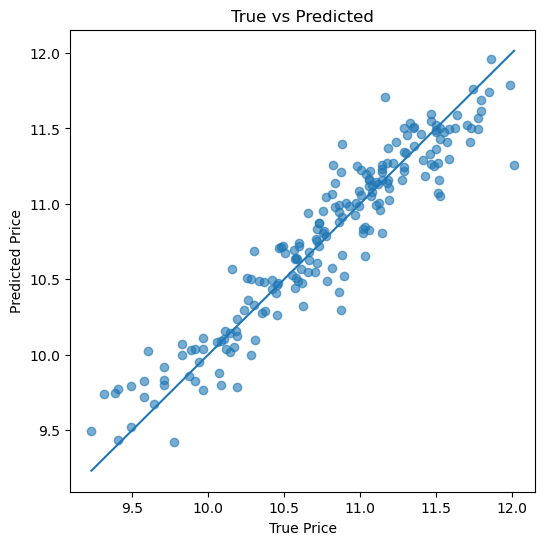

In [110]:
# first plot
import matplotlib.pyplot as plt
import numpy as np

y_pred = final_model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
m = min(y_test.min(), y_pred.min())
M = max(y_test.max(), y_pred.max())
plt.plot([m, M], [m, M])   # y=x line
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("True vs Predicted")
plt.show()


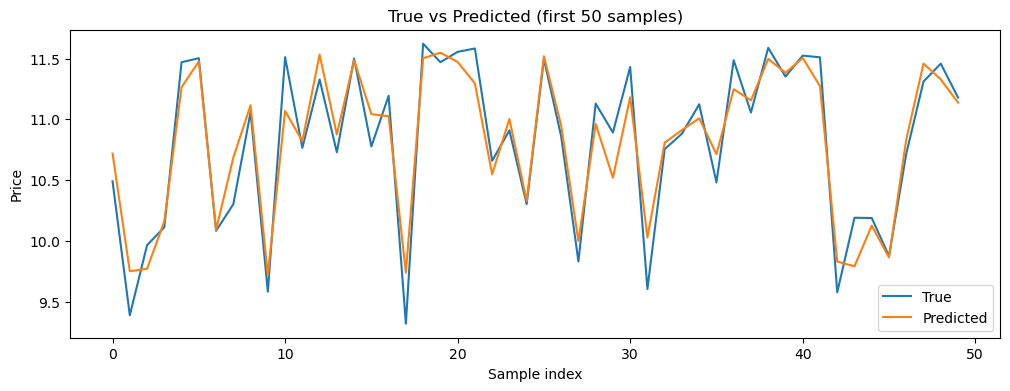

In [111]:
import matplotlib.pyplot as plt

y_pred = final_model.predict(x_test)

N = 50  # change to 100 if you want
plt.figure(figsize=(12,4))
plt.plot(y_test[:N].values, label="True")
plt.plot(y_pred[:N], label="Predicted")
plt.title(f"True vs Predicted (first {N} samples)")
plt.xlabel("Sample index")
plt.ylabel("Price")
plt.legend()
plt.show()


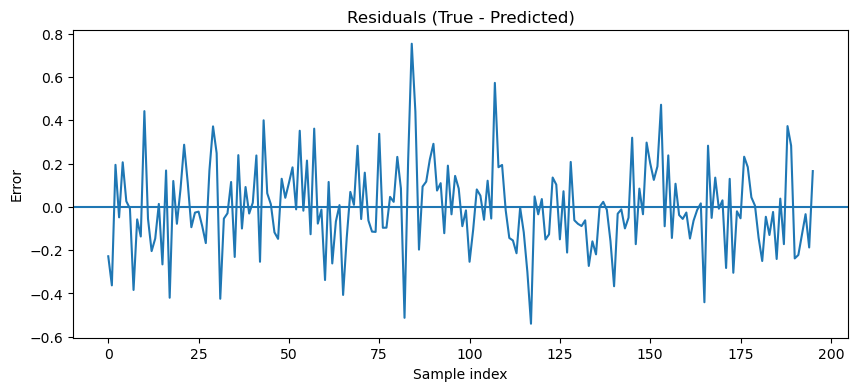

In [112]:
import matplotlib.pyplot as plt

y_pred = final_model.predict(x_test)
residuals = y_test - y_pred

plt.figure(figsize=(10,4))
plt.plot(residuals.values)
plt.axhline(0)
plt.title("Residuals (True - Predicted)")
plt.xlabel("Sample index")
plt.ylabel("Error")
plt.show()


In [113]:
import numpy as np

y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)


In [114]:
import pandas as pd

price_df = pd.DataFrame({
    "True_Price": y_test_exp,
    "Predicted_Price": y_pred_exp
})

price_df.head()


,True_Price,Predicted_Price
248,35964.000,45188.231812
555,11934.720,17154.651947
1251,21258.720,17504.672569
547,24634.008,25855.694751
885,95850.720,78002.687596
